In [275]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

# Read from dataset
# kabhir.csv is without hindi words
df = pd.read_csv('kabhir.csv')
df.head()

,id,type,time,author,author_id,re_tweeter,associated_tweet,text,links,hashtags,mentions,reply_count,favorite_count,retweet_count,lang,text_raw
0,1.140000e+18,tweet,1.560000e+12,SharmaRavitha,1.743972e+08,NaN,1.140000e+18,shahidkapoor I am in love with kabir Kabirsi...,[],[],"['@shahidkapoor', '@Kabirsingh']",0,0,0,en,@shahidkapoor I am in love with kabir @Kabirsi...
1,1.140000e+18,tweet,1.560000e+12,angry_rantman,9.400000e+17,NaN,1.140000e+18,That's because you are sweet teddy bear guy an...,[],[],[],2,14,0,en,That's because you are sweet teddy bear guy an...
2,1.140000e+18,tweet,1.560000e+12,pranaytikyani,6.440021e+07,NaN,1.140000e+18,I’m obsessed with Bekhayali and Kaise Hua Kab...,[],['#KabirSingh'],[],0,2,0,en,I'm obsessed with Bekhayali and Kaise Hua #Kab...
3,1.140000e+18,tweet,1.560000e+12,ishaqmb,1.029538e+08,NaN,1.140000e+18,The character of Kabir needs a psychological t...,[],"['#KabirSingh', '#kabirsinghboxoffice', '#Kabi...","['@mentalhealth', '@shahidkapoor', '@imvangasa...",0,2,1,en,The character of Kabir needs a psychological t...
4,1.140000e+18,tweet,1.560000e+12,BipinShukla1,3.796988e+08,NaN,1.140000e+18,Advani_Kiara You are such a beautiful.person a...,[],['#KabirSingh'],['@Advani_Kiara'],0,0,0,en,@Advani_Kiara You are such a beautiful.person ...


In [276]:
# Convert to lower case
df["text_raw"] = df["text_raw"].str.lower()
df["text_raw"].head()

0    @shahidkapoor i am in love with kabir @kabirsi...
1    that's because you are sweet teddy bear guy an...
2    i'm obsessed with bekhayali and kaise hua #kab...
3    the character of kabir needs a psychological t...
4    @advani_kiara you are such a beautiful.person ...
Name: text_raw, dtype: object

In [277]:
# TO expand contractions in english:

import re
abbr_dict={
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
c_re = re.compile('(%s)' % '|'.join(abbr_dict.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return abbr_dict[match.group(0)]
    return c_re.sub(replace, text)
df['text_raw'] = df["text_raw"].apply(lambda text: expandContractions(text))
df["text_raw"].head()

0    @shahidkapoor i am in love with kabir @kabirsi...
1    that is because you are sweet teddy bear guy a...
2    i am obsessed with bekhayali and kaise hua #ka...
3    the character of kabir needs a psychological t...
4    @advani_kiara you are such a beautiful.person ...
Name: text_raw, dtype: object

In [278]:
# Remove chat words:

chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
N=and
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
UR=Your
R=are
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""


chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

df['text_raw'] = df["text_raw"].apply(lambda text: chat_words_conversion(text))
df["text_raw"].head()

0    @shahidkapoor i am in love with kabir @kabirsi...
1    that is because you are sweet teddy bear guy a...
2    i am obsessed with bekhayali and kaise hua #ka...
3    the character of kabir needs a psychological t...
4    @advani_kiara you are such a beautiful.person ...
Name: text_raw, dtype: object

In [279]:
# Converting to lower case for stop words removal

df["text_raw"] = df["text_raw"].str.lower()
df["text_raw"].head()
df["text_raw"].head()

0    @shahidkapoor i am in love with kabir @kabirsi...
1    that is because you are sweet teddy bear guy a...
2    i am obsessed with bekhayali and kaise hua #ka...
3    the character of kabir needs a psychological t...
4    @advani_kiara you are such a beautiful.person ...
Name: text_raw, dtype: object

In [280]:
# Converting hinglish words to english:

hinglish={
"dost":"friend",
"pyaas":"onion",
"pyaar":"love",
"dada":"grandfather",
"baap":"father",
"beta":"son",
"bhai":"brother",
"behen":"sister",
"bhanja":"nephew",
"beti":"daughter",
"sahi":"true",
"phool":"flower",
"bhang":"drink",
"bandh":"strike",
"pasand":"like",
"karega":"will do",
"raha":"used to be",
"karta":"do",
"maine":"i have",
"kiya":"did",
"ladki":"girl",
"ladka":"boy",
"nahi":"no",
"dena":"give",
"yaad":"remember",
"mujhse":"with me",
"tumhara":"yours",
"aaya":"he came",
"kuttey":"dogs",
"aapko":"you",
"hasil":"get",
"dhyaan":"attention",
"aapki":"your",
"umar":"age",
"kya":"what",
"mujhe":"me",
"khaana":"food",
"aaj":"today",
"jagah":"place",
"woh":"they",
"cheez":"thing",
"toh":"of course",
"uske":"her",
"baad":"later",
"hua":"done",
"har":"every",
"kisi":"any",
"milega":"will get",
"matlab":"meaning",
"zayada":"more",
"itna":"this much",
"bada":"big",
"hai":"is",
"nai":"no",
"agar":"if",
"ek":"one",
"pagal":"fool",
"hum":"us",
"dono":"both",
"tum":"you",
"bhagwan":"god",
"kahan":"where",
"dekhte":"see",
"kaun":"who",
"neta":"leader",
"aadat":"habit",
"aakar":"after coming",
"accha":"good",
"aloo":"potato",
"angrez":"english",
"asli":"real",
"bachao":"save",
"bada":"big",
"badmash":"naughty",
"bas":"stop",
"biwi":"wife",
"chakka":"wheel",
"chota":"short",
"dabba":"bad",
"dai":"come on",
"desi":"local",
"filmi":"drama",
"firang":"foreigner",
"funda":"fundamental",
"gora":"white skinned man",
"jaan":"life",
"jawani":"youth",
"jungli":"wild",
"lathi":"stick",
"masjid":"mosque",
"mehenga":"costly",
"mela":"fair",
"mirchi":"chilli",
"pukka":"very good",
"sharm":"shame",
"timepass":"time pass",
"yaar":"friend",
"jaisa":"as",
"mera":"mine",
"saala":"idiot",
"diya":"gave",
"khol":"open",
"gaya":"gone",
"khush":"happy",
"apni":"mine",
"abhi":"now",
"faltu":"useless",
"sab":"everything",
"hath":"hand",
"karna":"do",
"hoga":"will happen",
"mere":"my",
"banaliya":"have made",
"uska":"his",
"havnt":"have not",
"nd":"and",
"aise":"like this",
"dekha":"saw",
"kaise":"how",
"hua":"happened"
}
c_re = re.compile(r'\b(?:%s)\b' % '|'.join(hinglish.keys()))
# c_re = re.compile('(%s)' % '|'.join(hinglish.keys()))

def hinglish_replace(text, c_re=c_re):
    def replace(match):
        return hinglish[match.group(0)]
    return c_re.sub(replace, text.lower())
df['text_raw'] = df["text_raw"].apply(lambda text: hinglish_replace(text))
df["text_raw"].head()

0    @shahidkapoor i am in love with kabir @kabirsi...
1    that is because you are sweet teddy bear guy a...
2    i am obsessed with bekhayali and how happened ...
3    the character of kabir needs a psychological t...
4    @advani_kiara you are such a beautiful.person ...
Name: text_raw, dtype: object

In [281]:
# remove stopwords

from nltk.corpus import stopwords
stopwords = list(stopwords.words('english'))
stopwords.extend(list(string.punctuation))  
stopwords.append("i\'ve")
stopwords.append("i\'m")
stopwords.remove("no")
stopwords.remove("not")
stopwords.remove("than")
stopwords.remove("which")

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stopwords])
df["text_raw"] = df["text_raw"].apply(lambda text: remove_stopwords(text))
df["text_raw"].head()

0    @shahidkapoor love kabir @kabirsingh superb mo...
1    sweet teddy bear guy chicks magnet behave like...
2              obsessed bekhayali happened #kabirsingh
3    character kabir needs psychological treatment ...
4    @advani_kiara beautiful.person talented actor ...
Name: text_raw, dtype: object

In [282]:
# remove words with @,#,https

df["text_raw"] = df["text_raw"].str.replace("@\S+|# \S+|www.\S+|https\S+|#\S+|http\S+|pic.\S+", '')
df["text_raw"].head()
df["text_raw"]=df["text_raw"].astype(str)
df["text_raw"].head()

0     love kabir  superb movie story, character, sc...
1    sweet teddy bear guy chicks magnet behave like...
2                         obsessed bekhayali happened 
3    character kabir needs psychological treatment ...
4     beautiful.person talented actor simplicity sa...
Name: text_raw, dtype: object

In [283]:
# Remove punctuations:

punctuation='[")\?,\.!(}:{;$%^&]'
df["text_raw"] = df["text_raw"].str.replace(punctuation, ' ')
df["text_raw"].head()

0     love kabir  superb movie story  character  sc...
1    sweet teddy bear guy chicks magnet behave like...
2                         obsessed bekhayali happened 
3    character kabir needs psychological treatment ...
4     beautiful person talented actor simplicity sa...
Name: text_raw, dtype: object

In [284]:
# Most frequent words

from collections import Counter
cnt = Counter()
for text in df["text_raw"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('kabir', 4587),
 ('singh', 4339),
 ('movie', 4082),
 ('not', 2483),
 ('…', 2103),
 ('shahid', 1410),
 ('film', 1381),
 ('love', 1292),
 ('watch', 1246),
 ('like', 1231)]

In [285]:
# to check accuracy between the manually labelled and generated data usin textblob

import numpy as np
import pandas as pd 
from sklearn.metrics import accuracy_score
from csv import reader
from sys import exit
from math import sqrt
from operator import itemgetter


df1 = df.iloc[0:999]
df2 = df.iloc[999:12083]

b = list(df.columns)
#b.remove('class')
#b.append('class')
df1[b].to_csv("blob.csv",index = False)
# df2[b].to_csv("train1.csv", index = False)
mannual = pd.read_csv("blob.csv")
mannual.head()

,id,type,time,author,author_id,re_tweeter,associated_tweet,text,links,hashtags,mentions,reply_count,favorite_count,retweet_count,lang,text_raw
0,1.140000e+18,tweet,1.560000e+12,SharmaRavitha,1.743972e+08,NaN,1.140000e+18,shahidkapoor I am in love with kabir Kabirsi...,[],[],"['@shahidkapoor', '@Kabirsingh']",0,0,0,en,love kabir superb movie story character sc...
1,1.140000e+18,tweet,1.560000e+12,angry_rantman,9.400000e+17,NaN,1.140000e+18,That's because you are sweet teddy bear guy an...,[],[],[],2,14,0,en,sweet teddy bear guy chicks magnet behave like...
2,1.140000e+18,tweet,1.560000e+12,pranaytikyani,6.440021e+07,NaN,1.140000e+18,I’m obsessed with Bekhayali and Kaise Hua Kab...,[],['#KabirSingh'],[],0,2,0,en,obsessed bekhayali happened
3,1.140000e+18,tweet,1.560000e+12,ishaqmb,1.029538e+08,NaN,1.140000e+18,The character of Kabir needs a psychological t...,[],"['#KabirSingh', '#kabirsinghboxoffice', '#Kabi...","['@mentalhealth', '@shahidkapoor', '@imvangasa...",0,2,1,en,character kabir needs psychological treatment ...
4,1.140000e+18,tweet,1.560000e+12,BipinShukla1,3.796988e+08,NaN,1.140000e+18,Advani_Kiara You are such a beautiful.person a...,[],['#KabirSingh'],['@Advani_Kiara'],0,0,0,en,beautiful person talented actor simplicity sa...


In [286]:
# To put labels for the dataset which we are checking for accuarcy:

from textblob import TextBlob 
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        sent=[]
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            sent.append('positive')
        elif analysis.sentiment.polarity == 0: 
            sent.append('neutral')
        else: 
            sent.append('negative')
        return " ".join(sent)
# mannual["textblob"]=mannual["text_raw"].apply(lambda text: get_tweet_sentiment(text))
# mannual["sent_score"]=mannual["text_raw"].apply(lambda text: get_tweet_sentiment(text))
# mannual.to_csv("C:/Users/asus/Documents/NLP/Project/blob.csv")
mannual.head()
textblob = pd.read_csv("C:/Users/asus/Documents/NLP/Project/blob.csv")
textblob.head()

,Unnamed: 0,id,type,time,author,author_id,re_tweeter,associated_tweet,Unnamed: 8,links,hashtags,mentions,reply_count,favorite_count,retweet_count,lang,text_raw,textblob_generated,manual_entered,text
0,0,1.140000e+18,tweet,1.560000e+12,SharmaRavitha,1.743972e+08,NaN,1.140000e+18,NaN,[],[],"['@shahidkapoor', '@Kabirsingh']",0,0,0,en,love kabir superb movie story character sc...,positive,positive,shahidkapoor I am in love with kabir Kabirsi...
1,1,1.140000e+18,tweet,1.560000e+12,angry_rantman,9.400000e+17,NaN,1.140000e+18,NaN,[],[],[],2,14,0,en,sweet teddy bear guy chicks magnet behave like...,positive,positive,That's because you are sweet teddy bear guy an...
2,2,1.140000e+18,tweet,1.560000e+12,pranaytikyani,6.440021e+07,NaN,1.140000e+18,NaN,[],['#KabirSingh'],[],0,2,0,en,i’m obsessed bekhayali kaise done,negative,positive,I’m obsessed with Bekhayali and Kaise Hua Kab...
3,3,1.140000e+18,tweet,1.560000e+12,ishaqmb,1.029538e+08,NaN,1.140000e+18,NaN,[],"['#KabirSingh', '#kabirsinghboxoffice', '#Kabi...","['@mentalhealth', '@shahidkapoor', '@imvangasa...",0,2,1,en,character kabir needs psychological treatment ...,negative,negative,The character of Kabir needs a psychological t...
4,4,1.140000e+18,tweet,1.560000e+12,BipinShukla1,3.796988e+08,NaN,1.140000e+18,NaN,[],['#KabirSingh'],['@Advani_Kiara'],0,0,0,en,beautiful person talented actor simplicity sa...,positive,positive,Advani_Kiara You are such a beautiful.person a...


In [287]:
print('Accuracy for generated labels using textblob is: %s' % accuracy_score(textblob["textblob_generated"], textblob["manual_entered"]))

Accuracy for generated labels using textblob is: 0.8338338338338338


## Generation of labels using POS Tagging

In [288]:
nltk.download('universal_tagset')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lem = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer 

pstem = PorterStemmer()
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
def pos_senti(df_copy):#takes
    li_swn=[]
    li_swn_pos=[]
    li_swn_neg=[]
    missing_words=[]
    for i in range(len(df_copy.index)):
        text = df_copy.loc[i]['text_raw']
        tokens = nltk.word_tokenize(text)
        tagged_sent = nltk.pos_tag(tokens)
        store_it = [(word, nltk.map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
        #print("Tagged Parts of Speech:",store_it)

        pos_total=0
        neg_total=0
        for word,tag in store_it:
            if(tag=='NOUN'):
                tag='n'
            elif(tag=='VERB'):
                tag='v'
            elif(tag=='ADJ'):
                tag='a'
            elif(tag=='ADV'):
                tag = 'r'
            else:
                tag='nothing'

            if(tag!='nothing'):
                concat = word+'.'+tag+'.01'
                try:
                    this_word_pos=swn.senti_synset(concat).pos_score()
                    this_word_neg=swn.senti_synset(concat).neg_score()
                    #print(word,tag,':',this_word_pos,this_word_neg)
                except Exception as e:
                    wor = lem.lemmatize(word)
                    concat = wor+'.'+tag+'.01'
                    # Checking if there's a possiblity of lemmatized word be accepted into SWN corpus
                    try:
                        this_word_pos=swn.senti_synset(concat).pos_score()
                        this_word_neg=swn.senti_synset(concat).neg_score()
                    except Exception as e:
                        wor = pstem.stem(word)
                        concat = wor+'.'+tag+'.01'
                        # Checking if there's a possiblity of lemmatized word be accepted
                        try:
                            this_word_pos=swn.senti_synset(concat).pos_score()
                            this_word_neg=swn.senti_synset(concat).neg_score()
                        except:
                            missing_words.append(word)
                            continue
                #print(this_word_neg)
                pos_total+=this_word_pos
                neg_total+=this_word_neg
        li_swn_pos.append(pos_total)
        li_swn_neg.append(neg_total)

        if(pos_total>neg_total):
                li_swn.append("positive")
        elif(pos_total<neg_total):
                li_swn.append("negative")
        else:
            li_swn.append("neutral")
    df_copy.insert(1,"pos_score",li_swn_pos,True)
    df_copy.insert(2,"neg_score",li_swn_neg,True)
    df_copy.insert(3,"postag",li_swn,True)
    return df_copy

postag=pos_senti(textblob)
postag.head()

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,Unnamed: 0,pos_score,neg_score,postag,id,type,time,author,author_id,re_tweeter,...,hashtags,mentions,reply_count,favorite_count,retweet_count,lang,text_raw,textblob_generated,manual_entered,text
0,0,2.375,0.125,positive,1.140000e+18,tweet,1.560000e+12,SharmaRavitha,1.743972e+08,NaN,...,[],"['@shahidkapoor', '@Kabirsingh']",0,0,0,en,love kabir superb movie story character sc...,positive,positive,shahidkapoor I am in love with kabir Kabirsi...
1,1,0.000,0.000,neutral,1.140000e+18,tweet,1.560000e+12,angry_rantman,9.400000e+17,NaN,...,[],[],2,14,0,en,sweet teddy bear guy chicks magnet behave like...,positive,positive,That's because you are sweet teddy bear guy an...
2,2,0.000,0.000,neutral,1.140000e+18,tweet,1.560000e+12,pranaytikyani,6.440021e+07,NaN,...,['#KabirSingh'],[],0,2,0,en,i’m obsessed bekhayali kaise done,negative,positive,I’m obsessed with Bekhayali and Kaise Hua Kab...
3,3,0.875,1.875,negative,1.140000e+18,tweet,1.560000e+12,ishaqmb,1.029538e+08,NaN,...,"['#KabirSingh', '#kabirsinghboxoffice', '#Kabi...","['@mentalhealth', '@shahidkapoor', '@imvangasa...",0,2,1,en,character kabir needs psychological treatment ...,negative,negative,The character of Kabir needs a psychological t...
4,4,2.000,0.250,positive,1.140000e+18,tweet,1.560000e+12,BipinShukla1,3.796988e+08,NaN,...,['#KabirSingh'],['@Advani_Kiara'],0,0,0,en,beautiful person talented actor simplicity sa...,positive,positive,Advani_Kiara You are such a beautiful.person a...


In [289]:
print('Accuracy for generated labels using textblob is: %s' % accuracy_score(postag["manual_entered"], postag["postag"]))

Accuracy for generated labels using textblob is: 0.6106106106106106


In [290]:
# Generating labels for the entire 12k dataset:

from textblob import TextBlob 
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        sent=[]
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            sent.append('positive')
        elif analysis.sentiment.polarity == 0: 
            sent.append('neutral')
        else: 
            sent.append('negative')
        return " ".join(sent)
df["label"]=df["text_raw"].apply(lambda text: get_tweet_sentiment(text))
df[["text_raw","label"]].head(5)

,text_raw,label
0,love kabir superb movie story character sc...,positive
1,sweet teddy bear guy chicks magnet behave like...,positive
2,obsessed bekhayali happened,negative
3,character kabir needs psychological treatment ...,negative
4,beautiful person talented actor simplicity sa...,positive


In [291]:
nltk.download('universal_tagset')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lem = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer 

pstem = PorterStemmer()
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
def pos_senti(df_copy):#takes
    li_swn=[]
    li_swn_pos=[]
    li_swn_neg=[]
    missing_words=[]
    for i in range(len(df_copy.index)):
        text = df_copy.loc[i]['text_raw']
        tokens = nltk.word_tokenize(text)
        tagged_sent = nltk.pos_tag(tokens)
        store_it = [(word, nltk.map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
        #print("Tagged Parts of Speech:",store_it)

        pos_total=0
        neg_total=0
        for word,tag in store_it:
            if(tag=='NOUN'):
                tag='n'
            elif(tag=='VERB'):
                tag='v'
            elif(tag=='ADJ'):
                tag='a'
            elif(tag=='ADV'):
                tag = 'r'
            else:
                tag='nothing'

            if(tag!='nothing'):
                concat = word+'.'+tag+'.01'
                try:
                    this_word_pos=swn.senti_synset(concat).pos_score()
                    this_word_neg=swn.senti_synset(concat).neg_score()
                    #print(word,tag,':',this_word_pos,this_word_neg)
                except Exception as e:
                    wor = lem.lemmatize(word)
                    concat = wor+'.'+tag+'.01'
                    # Checking if there's a possiblity of lemmatized word be accepted into SWN corpus
                    try:
                        this_word_pos=swn.senti_synset(concat).pos_score()
                        this_word_neg=swn.senti_synset(concat).neg_score()
                    except Exception as e:
                        wor = pstem.stem(word)
                        concat = wor+'.'+tag+'.01'
                        # Checking if there's a possiblity of lemmatized word be accepted
                        try:
                            this_word_pos=swn.senti_synset(concat).pos_score()
                            this_word_neg=swn.senti_synset(concat).neg_score()
                        except:
                            missing_words.append(word)
                            continue
                #print(this_word_neg)
                pos_total+=this_word_pos
                neg_total+=this_word_neg
        li_swn_pos.append(pos_total)
        li_swn_neg.append(neg_total)

        if(pos_total>neg_total):
                li_swn.append("positive")
        elif(pos_total<neg_total):
                li_swn.append("negative")
        else:
            li_swn.append("neutral")
    df_copy.insert(1,"pos_score",li_swn_pos,True)
    df_copy.insert(2,"neg_score",li_swn_neg,True)
    df_copy.insert(3,"postag",li_swn,True)
    return df_copy

df=pos_senti(df)
df.head()

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,id,pos_score,neg_score,postag,type,time,author,author_id,re_tweeter,associated_tweet,text,links,hashtags,mentions,reply_count,favorite_count,retweet_count,lang,text_raw,label
0,1.140000e+18,2.375,0.125,positive,tweet,1.560000e+12,SharmaRavitha,1.743972e+08,NaN,1.140000e+18,shahidkapoor I am in love with kabir Kabirsi...,[],[],"['@shahidkapoor', '@Kabirsingh']",0,0,0,en,love kabir superb movie story character sc...,positive
1,1.140000e+18,0.000,0.000,neutral,tweet,1.560000e+12,angry_rantman,9.400000e+17,NaN,1.140000e+18,That's because you are sweet teddy bear guy an...,[],[],[],2,14,0,en,sweet teddy bear guy chicks magnet behave like...,positive
2,1.140000e+18,0.000,0.000,neutral,tweet,1.560000e+12,pranaytikyani,6.440021e+07,NaN,1.140000e+18,I’m obsessed with Bekhayali and Kaise Hua Kab...,[],['#KabirSingh'],[],0,2,0,en,obsessed bekhayali happened,negative
3,1.140000e+18,0.875,1.875,negative,tweet,1.560000e+12,ishaqmb,1.029538e+08,NaN,1.140000e+18,The character of Kabir needs a psychological t...,[],"['#KabirSingh', '#kabirsinghboxoffice', '#Kabi...","['@mentalhealth', '@shahidkapoor', '@imvangasa...",0,2,1,en,character kabir needs psychological treatment ...,negative
4,1.140000e+18,2.000,0.250,positive,tweet,1.560000e+12,BipinShukla1,3.796988e+08,NaN,1.140000e+18,Advani_Kiara You are such a beautiful.person a...,[],['#KabirSingh'],['@Advani_Kiara'],0,0,0,en,beautiful person talented actor simplicity sa...,positive


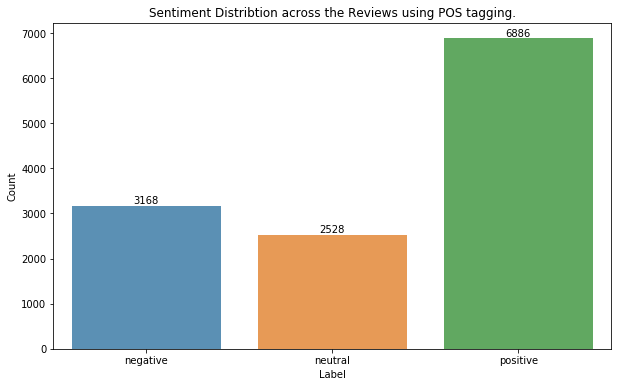

In [292]:
# df['label'].value_counts().plot('bar')
# plt.xlabel('Labels')
# plt.ylabel('Count')
# plt.title('Frequency graph for Labels')
# plt.show();
from matplotlib import pyplot as plt
import seaborn as sns
x=df['postag'].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Sentiment Distribtion across the Reviews using POS tagging.")
plt.ylabel('Count')
plt.xlabel('Label')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

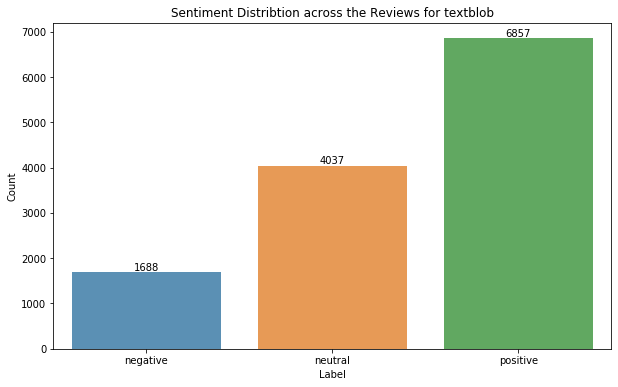

In [294]:
from matplotlib import pyplot as plt
import seaborn as sns
x=df['label'].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Sentiment Distribtion across the Reviews for textblob")
plt.ylabel('Count')
plt.xlabel('Label')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

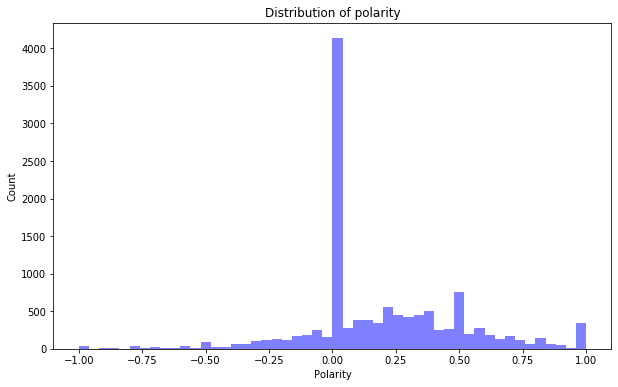

In [295]:
from matplotlib import pyplot as plt
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity'] = df.text.apply(detect_polarity)
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Distribution of polarity')
plt.show();

### Most polarity scores are above zero, meaning most of the reviews are positive sentiment in the data.

In [181]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text_raw'],df['label'],random_state = 0)
y_train

9775      neutral
10933    positive
12075    positive
9563     positive
693      positive
4320      neutral
5365      neutral
9583     positive
4982     positive
8663     positive
9651     positive
5917      neutral
8646     positive
10055    positive
10764     neutral
11936    positive
8960     positive
10454    positive
7279     negative
2315      neutral
6423      neutral
4379     positive
551       neutral
6863     positive
11132    positive
2648     negative
2217     positive
5356     positive
816       neutral
2980      neutral
           ...   
7599     negative
1871     positive
2046     positive
7877     positive
4851     positive
5072     positive
2163      neutral
6036     positive
6921     positive
6216     positive
11085    positive
537      positive
9893      neutral
2897      neutral
7768      neutral
2222     positive
10327    positive
2599      neutral
705       neutral
3468      neutral
6744      neutral
5874     positive
4373     negative
7891     positive
9225      

In [298]:
# Using keras classifier:

sentences = df['text_raw'].values
y = df['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [299]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [300]:
X_train

<9436x13869 sparse matrix of type '<class 'numpy.int64'>'
	with 119727 stored elements in Compressed Sparse Row format>

## Logistic Regression

In [301]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
# score = classifier.score(X_test, y_test)
y_pred2 = classifier.predict(X_test)


# print("Accuracy:", score)
print("Logistic Regression Accuracy Score -> ",accuracy_score(y_pred2,y_test)*100)

print(classification_report(y_pred2,y_test))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Accuracy Score ->  86.93579148124603
              precision    recall  f1-score   support

    negative       0.51      0.81      0.62       258
     neutral       0.94      0.81      0.87      1144
    positive       0.91      0.91      0.91      1744

    accuracy                           0.87      3146
   macro avg       0.79      0.85      0.80      3146
weighted avg       0.89      0.87      0.88      3146



In [302]:
from sklearn import model_selection, naive_bayes, svm
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['text_raw'],df['label'],test_size=0.2)

In [303]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [304]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['text_raw'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [305]:
print(Tfidf_vect.vocabulary_)

{'love': 2703, 'kabir': 2427, 'superb': 4311, 'movie': 2964, 'story': 4249, 'character': 855, 'scene': 3853, 'aggression': 286, 'flirting': 1734, 'made': 2746, 'worth': 4911, 'repeated': 3683, 'sweet': 4342, 'bear': 555, 'guy': 1958, 'chicks': 884, 'behave': 574, 'like': 2639, 'singh': 4052, 'girls': 1873, 'run': 3787, 'away': 485, 'obsessed': 3093, 'bekhayali': 582, 'happened': 1986, 'needs': 3025, 'treatment': 4556, 'instead': 2287, 'glorified': 1885, 'wrong': 4924, 'message': 2872, 'audience': 466, 'clapping': 925, 'mental': 2863, 'state': 4214, 'fun': 1814, 'beautiful': 561, 'person': 3280, 'talented': 4358, 'actor': 234, 'simplicity': 4045, 'says': 3846, 'cant': 779, 'describe': 1241, 'beauty': 563, 'words': 4898, 'many': 2788, 'success': 4287, 'bit': 628, 'searching': 3876, 'found': 1776, 'much': 2975, 'hate': 2009, 'ranveer': 3558, 'people': 3261, 'revenge': 3711, 'padmaavat': 3195, 'this': 4455, 'not': 3070, 'even': 1519, 'fans': 1635, 'lead': 2589, 'which': 4835, 'more': 2948,

In [306]:
print(Train_X_Tfidf)

  (0, 4733)	0.3238500600792085
  (0, 4537)	0.24197556320241975
  (0, 4235)	0.2534777228436335
  (0, 3315)	0.3221291186296573
  (0, 3228)	0.3265460694133996
  (0, 2805)	0.2636157512865248
  (0, 2706)	0.32939333401551635
  (0, 1803)	0.3356169847769437
  (0, 784)	0.3925014558652323
  (0, 667)	0.22557260360654444
  (0, 47)	0.2575774044010159
  (1, 1243)	1.0
  (2, 4899)	0.526143933640685
  (2, 4797)	0.5137134442991337
  (2, 4052)	0.2216637269470908
  (2, 2703)	0.3629339534425652
  (2, 2427)	0.21872879044332627
  (2, 1925)	0.4801800829533667
  (3, 4789)	0.20753546030997194
  (3, 4706)	0.3885195877517819
  (3, 4047)	0.3569142653862229
  (3, 3890)	0.29213385573061706
  (3, 3193)	0.39280649588486477
  (3, 3070)	0.1733100378898867
  (3, 909)	0.6394671748449244
  :	:
  (10061, 4427)	0.24177011340236007
  (10061, 3844)	0.20636752500453823
  (10061, 2964)	0.09866270924917536
  (10061, 2832)	0.24177011340236007
  (10061, 2788)	0.4039447485317557
  (10061, 2774)	0.1853684082802453
  (10061, 2746)	0.1

## SVM

In [307]:
from sklearn.metrics import classification_report
SVM = svm.SVC(C=3.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

print(classification_report(predictions_SVM,Test_Y))

SVM Accuracy Score ->  87.80294000794596
              precision    recall  f1-score   support

           0       0.60      0.72      0.66       302
           1       0.91      0.88      0.89       858
           2       0.93      0.91      0.92      1357

    accuracy                           0.88      2517
   macro avg       0.81      0.84      0.82      2517
weighted avg       0.89      0.88      0.88      2517



## Random Forest Classifier

In [308]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
text_classifier.fit(X_train, y_train)
#scores = text_classifier.score(X_test, y_test)
y_pred3 = text_classifier.predict(X_test)
#print("Accuracy:", scores)
print('RANDOM FOREST Accuracy Score --> %s' % accuracy_score(y_pred3, y_test))
print(classification_report(y_test,y_pred3))

RANDOM FOREST Accuracy Score --> 0.8251748251748252
              precision    recall  f1-score   support

    negative       0.98      0.20      0.33       414
     neutral       0.78      0.93      0.85       987
    positive       0.85      0.92      0.88      1745

    accuracy                           0.83      3146
   macro avg       0.87      0.68      0.69      3146
weighted avg       0.84      0.83      0.80      3146

